# Analisis exploratorio de Datos de Vinos
## Descripcion de la informacion

Este set de datos continee la calidad de diferentes vinos, siendo el vino rojo y el blanco en especifico.<br><br>
La calidad se basa en una escala del 0 al 10, siendo 0 muy malo, y 10 excelente.<br><br>
## Variables
<ol>
    <li>fixed acidity</li>
    <li>volatile acidity</li>
    <li>citric acid</li>
    <li>residual sugar</li>
    <li>chlorides</li>
    <li>free sulfur dioxide</li>
    <li>total sulfur dioxide</li>
    <li>density</li>
    <li>pH</li>
    <li>sulphates</li>
</ol>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#carga de archvo CSV
eda_wine_data = pd.read_csv("vinos.csv", sep=";")

#muestra de cinco valores del archivo CSV
eda_wine_data.head()

Matplotlib is building the font cache; this may take a moment.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
#visualizacion de numero de opbservaciones
eda_wine_data.shape

(1599, 12)

Como podemos observar, este archivo contiene 1,599 observaciones,mientras el numero de variables que encontramos son 12, incluyendo nuestro valor objetivo quees la calidad del vino.<br><br>
## Estadistica descriptiva

In [17]:
eda_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Empezando con la fila de <b>count</b> podemos observar que las 12 columnas continene valores de 1,599, por lo que nos ayuda a revisar que no se tiene ningun valor nulo en la misma.<br>
La forma en que el <b>min</b>,<b>max</b> y <b>mean</b> se comportan, nos hacen denotar que no hay picos demasiado largos que puedan afectar le muestreo ni la necesidad de hacer una normalizacion, salvo por la variable de <b>residual sugar</b> la cual si tiene un valor maximo que va demasiado lejos despues del tercer cuartil.<br><br>

## Limpieza de datos

In [18]:
duplicate_entries = eda_wine_data[eda_wine_data.duplicated()]
duplicate_entries.shape

(240, 12)

Al parecer hay un total de 240 valores repetidos, a lo cual se eliminaran de la muestra tomada con la finalidad de mantener el menor ruido posible al momento de tratar de predecir la calidad del vino.

In [19]:
eda_wine_data.drop_duplicates(inplace=True)
eda_wine_data.shape

(1359, 12)

## Valores perdidos.
A pesar de haber hecho el analisis descriptivo con la finalidad de revisar que no hubiese ningun valor nulo, volveremos a hacer este ejercicio con otro comando para ver efectivamente si no se encuentra ningun valor nulo en nuestro data frame

In [20]:
eda_wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

y efectivamente se encuentra que no hay ningun valor vacio que pueda hacer ruido al momento de ser procesada la informacion. Por lo cual procederemos al siguiente paso.<br><br>
## Visualizacion de datos
Para empezar realizaremos un analisis de los histogramas de cada una de las variables que se encuentran en el set de datos.

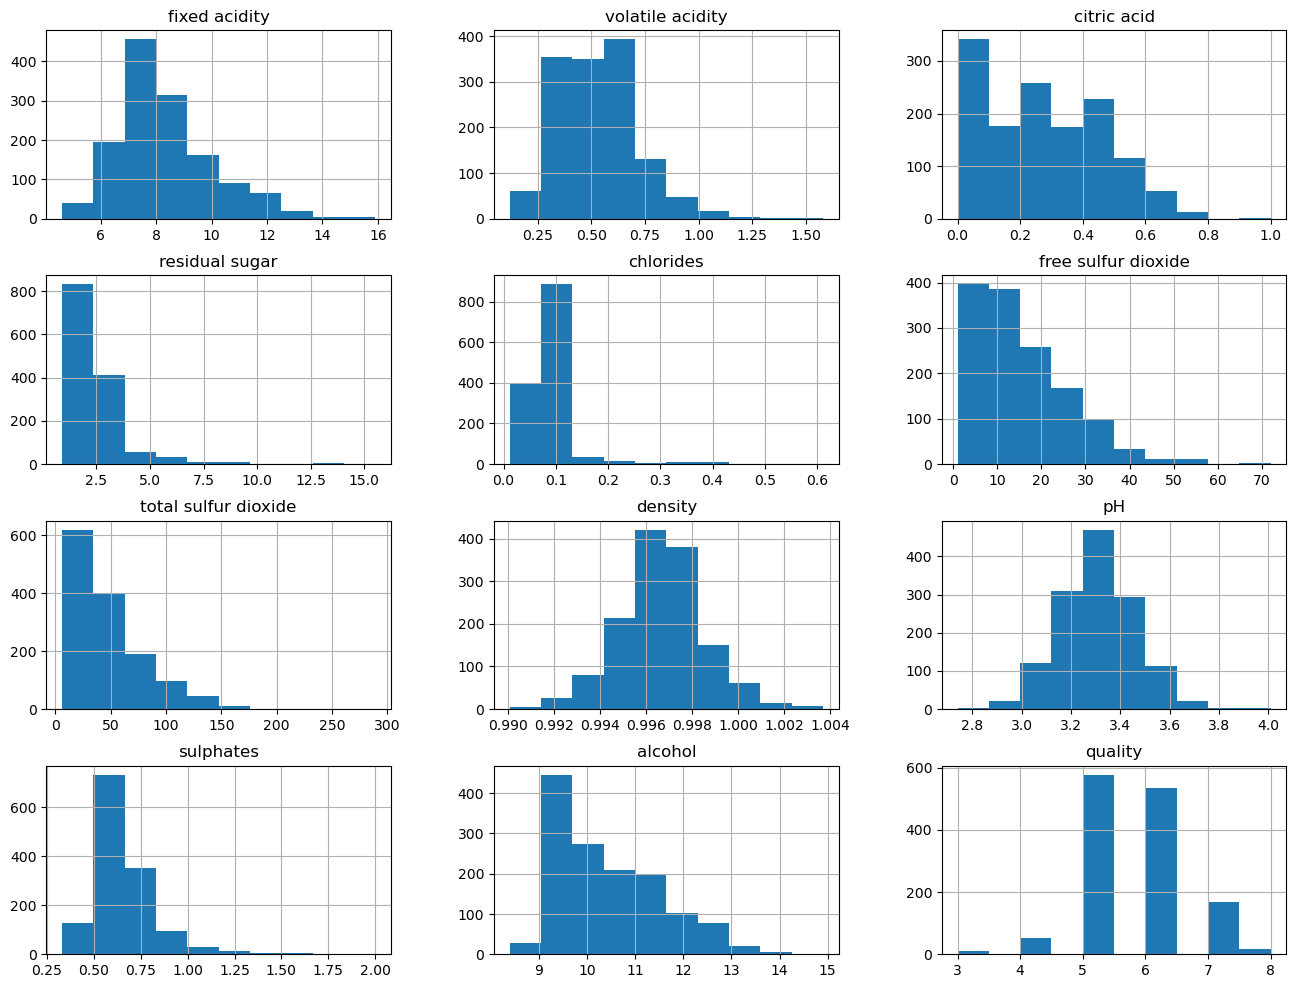

In [22]:
eda_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

### observaciones
<ul>
    <li>El <b>alcohol</b> parece estar positivamente cesgado junto con un poco del atributo <b>free sulfur dioxide</b> y el <b>total sulfur dioxide</b></li>
    <li>Mientras que los atributos de <b>density</b> y <b>pH</b> son los atributos que tienes una distribucion mas normalizada</li>
    <li>Por ultimo, podemos ver que la <b>quality</b> suele estar en un rango de 5 a 7, mas que en valores negativos, siendo los menores a 5 esos negativos</li>
</ul>
<br>A continuacion se hara otra observacion en base a mapas de calor con la finalidad de ver las correlaciones de los diferrentes atributos que se tiene.

<AxesSubplot:>

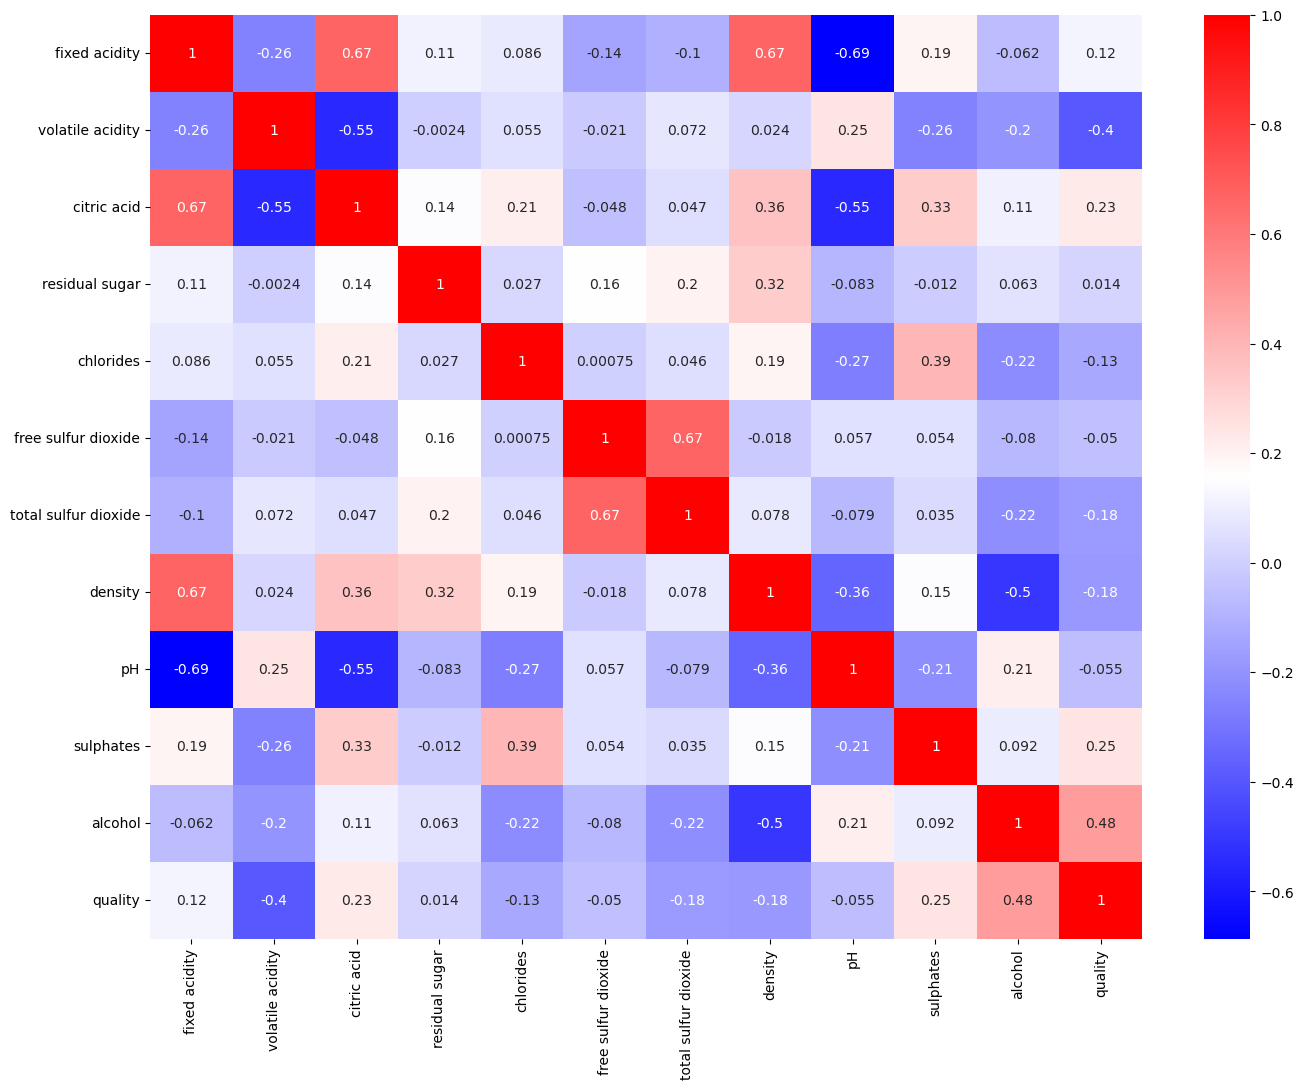

In [23]:
plt.figure(figsize=(16, 12))
sns.heatmap(eda_wine_data.corr(), cmap='bwr', annot=True)

### Observaciones
<ul>
    <li>La variable <b>Alcohol</b> tiene la correlacion mas positiva con relacion a la calidad del vino(<b>wine quality</b>) mientras que a esta le siguen otras variables como <b>sulphates</b>, <b>citric_acid</b> y <b>fixed_acidity</b></li>
    <li>Hay una gran correlacion entre las variables <b>fixed_acidity</b> y <b>citric_acid</b>, ademas de entre las variables <b>fixed_acidity</b> y <b>density</b></li>
    <li>Hay una gran correlacion negativa entre los atributos <b>fixed_acidity</b> y <b>fixed_acidity</b></li>
    <li>La <b>Density</b> tiene una fuerte correlacion con <b>fixed_acidity</b>, mientras que tiene una gran correlacion negativa con <b>alcohol</b></li>
    <li><b>citric acid</b> tiene una gran correlacion negativa con <b>volatile acidity</b>y con <b>pH</b></li>
</ul>

## Referencias
<ul>
    <li>DPhi (2021). <a href="https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv">Wine quality red</a></li>
    <li>quantinsti (2022) <a href="https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/">Creating Heatmap Using Python Seaborn</a></li>
    <li>datagy (2022) <a href="https://datagy.io/histogram-python/">Plotting a Histogram in Python with Matplotlib and Pandas</a></li>
</ul>